In [196]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
x_data = np.linspace(0.0,10.0,1000000)

In [198]:
noise = np.random.randn(len(x_data))

In [199]:
y_true = (0.5 * x_data) + 5 + noise

In [200]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [201]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [202]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [203]:
y_df.head()

,Y
0,4.310612
1,5.232653
2,4.962392
3,4.570334
4,4.413991


In [204]:
my_data = pd.concat([x_df,y_df],axis=1)

In [205]:
my_data.head()

,X Data,Y
0,0.00000,4.310612
1,0.00001,5.232653
2,0.00002,4.962392
3,0.00003,4.570334
4,0.00004,4.413991


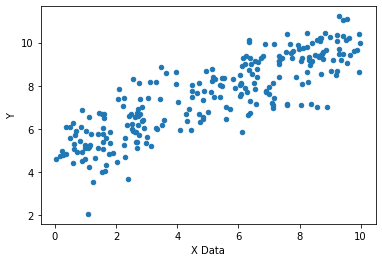

In [206]:
my_data.sample(n=250).plot(kind='scatter',x = 'X Data',y='Y')

In [207]:
batch_size = 8

In [208]:
np.random.randn(2)

array([-0.82332585,  0.37286826])

In [209]:
m = tf.Variable(1.12)
b = tf.Variable(-0.71)

In [210]:
xph = tf.placeholder(tf.float32,[batch_size])

In [211]:
yph = tf.placeholder(tf.float32,[batch_size])

In [212]:
y_model = m*xph + b

In [213]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [214]:
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [215]:
train = optmizer.minimize(error)

In [216]:
init = tf.global_variables_initializer()

In [217]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])
        

In [218]:
model_m

0.5745561

In [219]:
model_b

4.8820043

In [220]:
y_hat = x_data*model_m + model_b

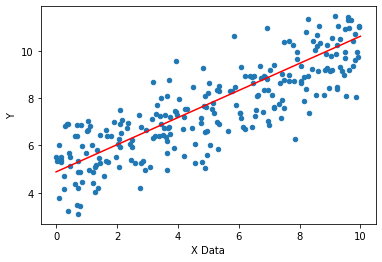

In [221]:
my_data.sample(n=250).plot(kind='scatter',x = 'X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator

In [222]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [223]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a52998950>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [226]:
x_train.shape

(700000,)

In [227]:
x_test.shape

(300000,)

In [228]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [229]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,
                                                      shuffle=False)

In [230]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,
                                                num_epochs=1000,shuffle=False)

In [231]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4/model.ckpt.
INFO:tensorflow:loss = 459.65198, step = 1
INFO:tensorflow:global_step/sec: 406.144
INFO:tensorflow:loss = 37.998905, step = 101 (0.248 sec)
INFO:tensorflow:global_step/sec: 726.376
INFO:tensorflow:loss = 18.30534, step = 201 (0.138 sec)
INFO:tensorflow:global_step/sec: 687.171
INFO:tensorflow:loss = 12.607301, step = 301 (0.145 sec)
INFO:tensorflow:global_step/sec: 679.372
INFO:tensorflow:loss = 17.833088, step = 401 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.293
INFO:tensorflow:loss = 7.3337135, step = 501 (0.148 sec)
INFO:tensorflow:global_step/sec: 297.642
INFO:tensorflow:loss = 5.3628745, step = 601 (0.338 sec)
INFO:tensorflo

In [232]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12T15:28:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-12-15:28:30
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1030288, global_step = 1000, label/mean = 7.5096073, loss = 8.82423, prediction/mean = 7.3802166
INFO:tensorflow:Saving '

In [234]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-08-12T15:32:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-08-12-15:32:05
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0848514, global_step = 1000, label/mean = 7.479347, loss = 8.678811, prediction/mean = 7.3587823
INFO:tensorflow:Saving '

In [236]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.1030288, 'label/mean': 7.5096073, 'loss': 8.82423, 'prediction/mean': 7.3802166, 'global_step': 1000}


In [238]:
print("TEST METRICS")
print(test_metrics)

TEST METRICS
{'average_loss': 1.0848514, 'label/mean': 7.479347, 'loss': 8.678811, 'prediction/mean': 7.3587823, 'global_step': 1000}


In [239]:
brand_new_data = np.linspace(0,10,10)

In [240]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [241]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4128275], dtype=float32)},
 {'predictions': array([5.0719514], dtype=float32)},
 {'predictions': array([5.7310753], dtype=float32)},
 {'predictions': array([6.3901997], dtype=float32)},
 {'predictions': array([7.0493236], dtype=float32)},
 {'predictions': array([7.7084475], dtype=float32)},
 {'predictions': array([8.367571], dtype=float32)},
 {'predictions': array([9.026695], dtype=float32)},
 {'predictions': array([9.68582], dtype=float32)},
 {'predictions': array([10.344944], dtype=float32)}]

In [243]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/z2/hfrcmpyx7tzbsp3z1jv60k880000gp/T/tmpnof3ajk4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [245]:
predictions

[array([4.4128275], dtype=float32),
 array([5.0719514], dtype=float32),
 array([5.7310753], dtype=float32),
 array([6.3901997], dtype=float32),
 array([7.0493236], dtype=float32),
 array([7.7084475], dtype=float32),
 array([8.367571], dtype=float32),
 array([9.026695], dtype=float32),
 array([9.68582], dtype=float32),
 array([10.344944], dtype=float32)]

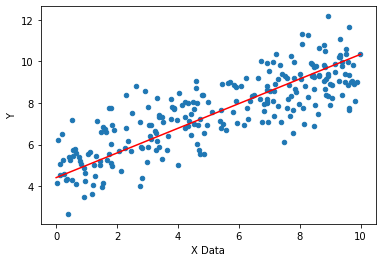

In [253]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,color='red')